# Widgets 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

In [2]:
df = pd.read_csv("dvf_loyers.csv", sep=";")

### Widget 1 : Rendement Locatif Brut par Arrondissement à Paris

Formule du rendement brut : rendement_brut = (loyer_mensuel_total * 12) / prix_achat * 100

In [3]:
df['rendement_brut'] = (df['loyer_ref_m2'] * df['surface_reelle_bati'] * 12) / df['valeur_fonciere'] * 100

Moyenne du rendement brut par arrondissement, trié dans l'ordre décroissant

In [4]:
rendement_arr = df.groupby('arrondissement')['rendement_brut'].mean().sort_values(ascending=False)

Affichage du widget

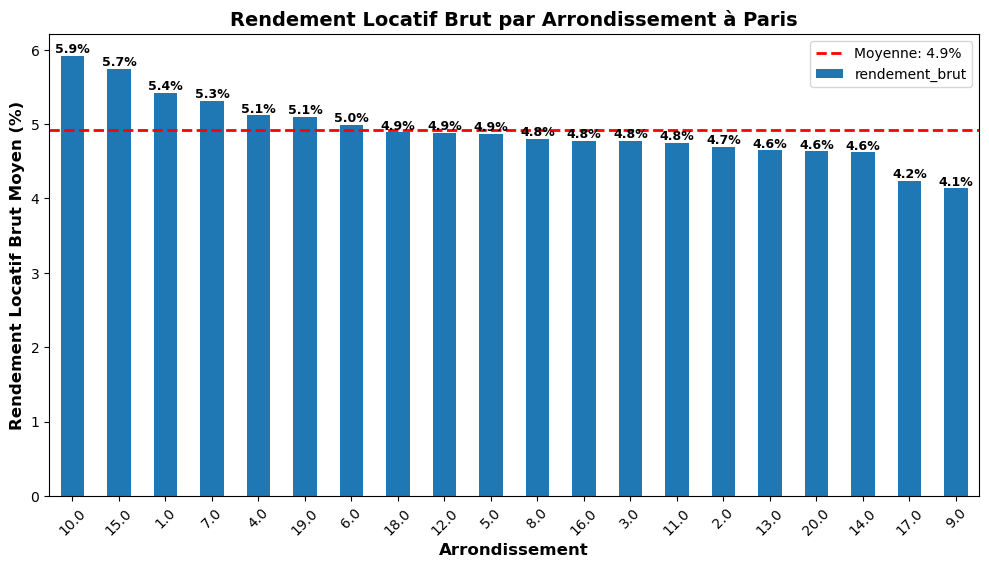

In [5]:
rendement_arr.plot(kind='bar', figsize=(12, 6))

for i, v in enumerate(rendement_arr.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel('Arrondissement', fontsize=12, fontweight='bold')
plt.ylabel('Rendement Locatif Brut Moyen (%)', fontsize=12, fontweight='bold')
plt.title('Rendement Locatif Brut par Arrondissement à Paris', fontsize=14, fontweight='bold')
plt.axhline(y=rendement_arr.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {rendement_arr.mean():.1f}%')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Nous pouvons remarquer qu'en moyenne, le 10ème arrondissement est celui ou le rendement brut est en moyenne le plus élevé.

En revanche, on peut affiner cette analyse.

### Widget 2 : Top 15 quartiers les plus rentables - Bar chart horizontal

on cherche les 15 quartiers les plus rentables en rendement brute

In [6]:
quartiers_rentables = df.groupby('quartier')['rendement_brut'].mean().sort_values(ascending=False).head(15)

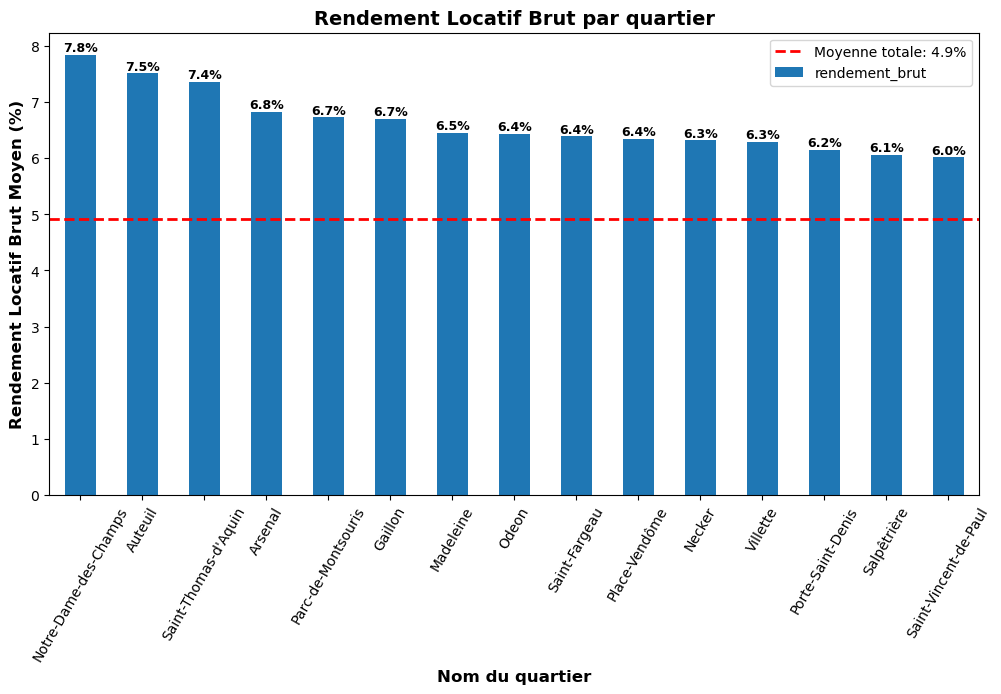

In [7]:
moyenne_rendement_brut_total = df['rendement_brut'].mean()
quartiers_rentables.plot(kind='bar', figsize=(12, 6))

for i, v in enumerate(quartiers_rentables.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel('Nom du quartier', fontsize=12, fontweight='bold')
plt.ylabel('Rendement Locatif Brut Moyen (%)', fontsize=12, fontweight='bold')
plt.title('Rendement Locatif Brut par quartier', fontsize=14, fontweight='bold')
plt.axhline(y=moyenne_rendement_brut_total, color='red', linestyle='--', linewidth=2, label=f'Moyenne totale: {moyenne_rendement_brut_total:.1f}%')
plt.legend()
plt.xticks(rotation=60)
plt.show()

### Widget 3 : Map du rendement brut locatif par quartier en fonction de la superficie du bien

In [ ]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# 1️⃣ Chargement du fichier
df = pd.read_csv("dvf_loyers.csv", sep=';', encoding='utf-8')

# 2️⃣ Calcul du rendement locatif brut (%)
df['rendement_brut'] = (df['loyer_ref_m2'] * df['surface_reelle_bati'] * 12) / df['valeur_fonciere'] * 100

# 3️⃣ Nettoyage des données
df = df.dropna(subset=['latitude', 'longitude', 'quartier', 'rendement_brut', 'surface_reelle_bati'])
df = df[(df['rendement_brut'] > 0) & (df['rendement_brut'] <= 20)]

# 4️⃣ Création du curseur pour la surface
surface_min = int(df['surface_reelle_bati'].min())
surface_max = int(df['surface_reelle_bati'].max())

surface_slider = widgets.IntRangeSlider(
    value=[20, 100],  # plage initiale visible
    min=surface_min,
    max=surface_max,
    step=5,
    description='Surface (m²) :',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%')
)

# 5️⃣ Fonction d'affichage dynamique
def afficher_carte(surface_range):
    min_surf, max_surf = surface_range

    # Filtrage selon la surface choisie
    subset = df[(df['surface_reelle_bati'] >= min_surf) & (df['surface_reelle_bati'] <= max_surf)]

    # Calcul du rendement moyen par quartier
    rendement_quartier = (
        subset.groupby('quartier', as_index=False)
        .agg({
            'rendement_brut': 'mean',
            'latitude': 'mean',
            'longitude': 'mean'
        })
    )

    # Création de la carte
    fig = px.scatter_mapbox(
        rendement_quartier,
        lat='latitude',
        lon='longitude',
        color='rendement_brut',
        color_continuous_scale='RdYlGn',
        range_color=[rendement_quartier['rendement_brut'].min(), rendement_quartier['rendement_brut'].max()],
        size='rendement_brut',
        size_max=15,
        hover_name='quartier',
        hover_data={'rendement_brut': ':.2f'},
        zoom=11,
        mapbox_style='open-street-map',
        title=f"Rendement locatif brut moyen par quartier à Paris<br>(biens de {min_surf} à {max_surf} m²)"
    )

    fig.update_layout(
        mapbox=dict(
            center=dict(lat=rendement_quartier['latitude'].mean(),
                        lon=rendement_quartier['longitude'].mean()),
            zoom=11
        ),
        margin={"r":0,"t":40,"l":0,"b":0}
    )

    fig.show()

# 6️⃣ Liaison du widget et affichage
widgets.interact(afficher_carte, surface_range=surface_slider)


interactive(children=(IntRangeSlider(value=(20, 100), continuous_update=False, description='Surface (m²) :', l…

<function __main__.afficher_carte(surface_range)>

Afin d'avoir une vision plus globale, on peut comparer tout les quartier de Paris en affichant les quartier ayant des rendement les plus important.

Cette analyse est faite à partir du loyer moyen et du prix au m² par rapport à la surface.

### Widget 4 : Distribution des loyers à Paris

Colonnes disponibles : ['date_mutation', 'valeur_fonciere', 'adresse_nom_voie', 'nom_commune', 'surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude', 'prix_m2', 'arrondissement', 'quartier', 'numero_insee_quartier', 'loyer_ref_m2', 'loyer_majore_m2', 'loyer_minore_m2', 'distance_quartier_m']


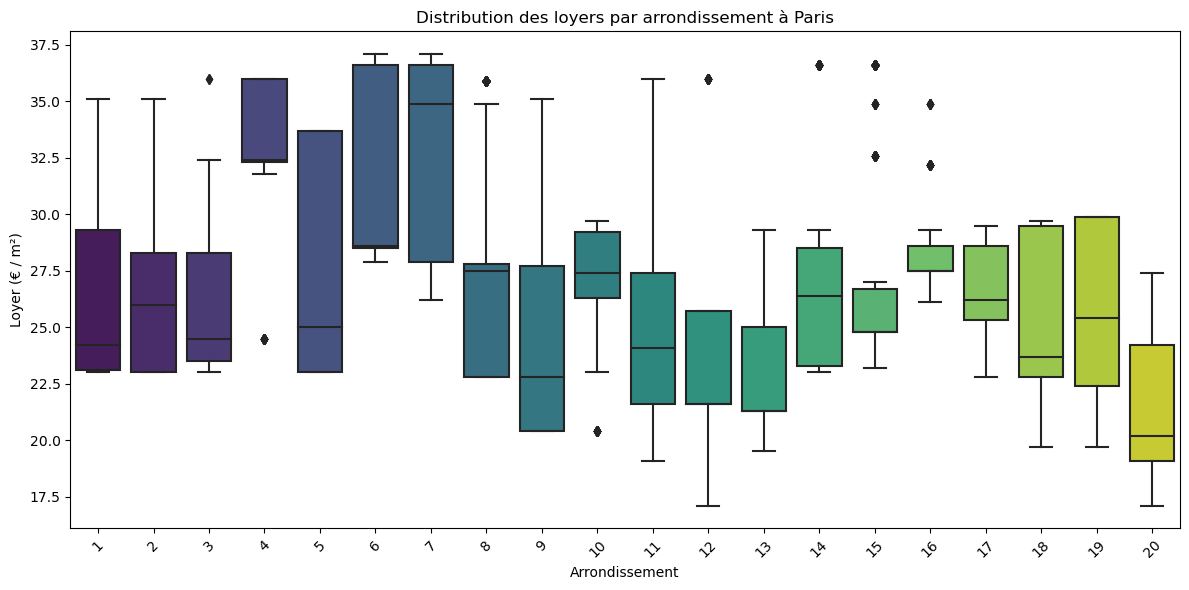

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Chargement du fichier
df = pd.read_csv("dvf_loyers.csv", sep=';', encoding='utf-8')

# 2️⃣ Vérification des colonnes disponibles
print("Colonnes disponibles :", df.columns.tolist())

# 3️⃣ Création d'une colonne 'Loyers de référence' si elle n'existe pas
if 'Loyers de référence' not in df.columns and 'loyer_ref_m2' in df.columns:
    df['Loyers de référence'] = df['loyer_ref_m2']

# 4️⃣ Nettoyage
df = df.dropna(subset=['Loyers de référence', 'arrondissement'])
df['arrondissement'] = df['arrondissement'].astype(str).str.extract(r'(\d{1,2})')[0].astype(int)

# 5️⃣ Filtrer pour ne garder que Paris (1 à 20)
df = df[(df['arrondissement'] >= 1) & (df['arrondissement'] <= 20)]

# 6️⃣ Création du boxplot
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='arrondissement',
    y='Loyers de référence',
    palette='viridis'
)

plt.title("Distribution des loyers par arrondissement à Paris")
plt.xlabel("Arrondissement")
plt.ylabel("Loyer (€ / m²)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Néanmoins, on remarque que quelque soit l'arrondissement et donc la tranche de loyer, il est possible d'avoir de très bon rendement.

In [12]:
# 2️⃣ Calcul du rendement locatif brut (%)
df['rendement_brut'] = (df['loyer_ref_m2'] * df['surface_reelle_bati'] * 12) / df['valeur_fonciere'] * 100

# 3️⃣ Nettoyage des données
df = df.dropna(subset=['arrondissement', 'rendement_brut'])
df = df[(df['rendement_brut'] > 0) & (df['rendement_brut'] <= 20)]  # suppression des rendements extrêmes

# 4️⃣ Visualisation : Boxplot du rendement par arrondissement
fig = px.box(
    df,
    x='arrondissement',
    y='rendement_brut',
    color='arrondissement',
    title='Distribution du rendement locatif brut par arrondissement à Paris',
    labels={
        "arrondissement": "Arrondissement",
        "rendement_brut": "Rendement locatif brut (%)"
    }
)

fig.update_layout(
    showlegend=False,
    template="plotly_white",
    xaxis_title="Arrondissement de Paris",
    yaxis_title="Rendement locatif brut (%)",
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.show()

### Widget 5 et 6 : Evolution du rendement brut par quartier sur les 5 dernières années

Le passé nous sert à prédire le futur

In [ ]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# --- Préparation ---
df['annee_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce').dt.year

# --- Widgets ---
critere_widget = widgets.Dropdown(
    options=['rendement_brut', 'prix_m2'],
    value='rendement_brut',
    description='Indicateur :',
    style={'description_width': 'initial'}
)

quartier_widget = widgets.Dropdown(
    options=['Tous les quartiers'] + sorted(df['quartier'].dropna().unique().tolist()),
    value='Tous les quartiers',
    description='Quartier :',
    style={'description_width': 'initial'}
)

# --- Fonction d'affichage ---
def evolution_temps(critere, quartier):
    if quartier == 'Tous les quartiers':
        # moyenne globale par quartier (courbes multiples)
        data = df.groupby(['annee_mutation', 'quartier'], as_index=False)[critere].mean()
        fig = px.line(
            data,
            x='annee_mutation',
            y=critere,
            color='quartier',
            markers=True,
            title=f"Évolution de {critere.replace('_',' ')} par quartier à Paris"
        )
    else:
        # focus sur un seul quartier
        data = (
            df[df['quartier'] == quartier]
            .groupby('annee_mutation', as_index=False)[critere].mean()
        )
        fig = px.line(
            data,
            x='annee_mutation',
            y=critere,
            markers=True,
            title=f"Évolution de {critere.replace('_',' ')} dans le quartier {quartier}"
        )

    fig.update_layout(
        xaxis_title="Année",
        yaxis_title=critere.replace("_", " ").capitalize(),
        legend_title="Quartier",
        hovermode="x unified"
    )
    fig.show()

# --- Interface interactive ---
widgets.interact(evolution_temps, critere=critere_widget, quartier=quartier_widget)


interactive(children=(Dropdown(description='Indicateur :', options=('rendement_brut', 'prix_m2'), style=Descri…

<function __main__.evolution_temps(critere, quartier)>

### Widget 7 : Concentration de commerce dans Paris
Il est essentiel de savoir où se trouve les points chauds des commercants, puisque c'est la où la demande de locaux pros est la plus forte.

--> correlation positive

In [16]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# 1️⃣ Chargement du fichier nettoyé
dv = pd.read_csv("commerce_nettoye.csv", sep=";", encoding="utf-8")

# 2️⃣ Chargement du fichier DVF (pour récupérer les quartiers)
# ⚠️ Adapter le chemin si besoin
dvf = pd.read_csv("dvf_loyers.csv", sep=";", encoding="utf-8")

# 3️⃣ Association du commerce au quartier le plus proche
# On suppose que tu as déjà les colonnes 'quartier' ou 'arrondissement' dans dvf
# On peut arrondir les coordonnées et faire un mapping rapide (sinon via spatial join avec geopandas)
# Pour simplifier, on va regrouper par arrondissement directement si tu l’as dans dvf

# Nettoyage minimal
dv = dv.dropna(subset=['latitude', 'longitude', 'categorie_commerce'])

# 4️⃣ Widget pour choisir une catégorie
categorie_widget = widgets.Dropdown(
    options=['Tous les commerces'] + sorted(dv['categorie_commerce'].unique().tolist()),
    value='Tous les commerces',
    description='Type de commerce :',
    style={'description_width': 'initial'}
)

# 5️⃣ Fonction d'affichage
def afficher_carte_commerces(categorie):
    # Filtrage
    if categorie == 'Tous les commerces':
        subset = dv.copy()
        title = "Densité totale de commerces à Paris"
    else:
        subset = dv[dv['categorie_commerce'] == categorie].copy()
        title = f"Densité de commerces à Paris — catégorie : {categorie.capitalize()}"

    # On suppose qu’on peut approximer l’arrondissement avec la latitude/longitude des commerces
    # On utilise le fichier DVF pour récupérer les arrondissements (via la position la plus proche)
    # Regroupement : nombre de commerces moyens par arrondissement

    # Si ton fichier commerce_nettoye contient déjà une colonne "arrondissement", on utilise directement :
    if 'arrondissement' in subset.columns:
        commerce_par_zone = (
            subset.groupby('arrondissement', as_index=False)
            .agg({
                'latitude': 'mean',
                'longitude': 'mean',
                'categorie_commerce': 'count'
            })
            .rename(columns={'categorie_commerce': 'nb_commerces'})
        )
    elif 'quartier' in subset.columns:
        commerce_par_zone = (
            subset.groupby('quartier', as_index=False)
            .agg({
                'latitude': 'mean',
                'longitude': 'mean',
                'categorie_commerce': 'count'
            })
            .rename(columns={'categorie_commerce': 'nb_commerces'})
        )
    else:
        # fallback : cluster par grille géographique
        subset['lat_bin'] = subset['latitude'].round(3)
        subset['lon_bin'] = subset['longitude'].round(3)
        commerce_par_zone = (
            subset.groupby(['lat_bin', 'lon_bin'], as_index=False)
            .size()
            .rename(columns={'size': 'nb_commerces', 'lat_bin': 'latitude', 'lon_bin': 'longitude'})
        )
        title += " (approximation géographique)"

    # 6️⃣ Création de la carte de densité
    fig = px.scatter_mapbox(
        commerce_par_zone,
        lat='latitude',
        lon='longitude',
        color='nb_commerces',
        color_continuous_scale='YlOrRd',  # jaune → rouge (forte densité)
        size='nb_commerces',
        size_max=20,
        zoom=11,
        hover_name=commerce_par_zone.columns[0],
        hover_data={'nb_commerces': True, 'latitude': False, 'longitude': False},
        mapbox_style='open-street-map',
        title=title
    )

    fig.update_layout(
        margin={"r":0,"t":40,"l":0,"b":0},
        mapbox=dict(center=dict(lat=48.8566, lon=2.3522), zoom=11)
    )

    fig.show()

# 7️⃣ Lancement du widget interactif
widgets.interact(afficher_carte_commerces, categorie=categorie_widget)



interactive(children=(Dropdown(description='Type de commerce :', options=('Tous les commerces', '3d_printing',…

<function __main__.afficher_carte_commerces(categorie)>

### Widget 8 : Meilleur opportunité de rendement en fonction de la concentration de commerce.

In [17]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# === 1️⃣ Chargement des données ===
df = pd.read_csv("dvf_loyers.csv", sep=';', encoding_errors='replace')
commerce = pd.read_csv("commerce_nettoye.csv", sep=';', encoding='utf-8')

# === 2️⃣ Nettoyage basique ===
df = df.dropna(subset=['latitude', 'longitude', 'valeur_fonciere', 'loyer_ref_m2', 'surface_reelle_bati'])
commerce = commerce.dropna(subset=['latitude', 'longitude'])

# === 3️⃣ Calcul du rendement brut ===
df['rendement_brut'] = (df['loyer_ref_m2'] * df['surface_reelle_bati'] * 12) / df['valeur_fonciere'] * 100

# 💡 3.1️⃣ Filtrage des valeurs aberrantes
df = df[(df['rendement_brut'] > 0) & (df['rendement_brut'] <= 20)]

# === 4️⃣ Regroupement géographique (cellules de 0.005° ≈ 300–400 m à Paris) ===
df['lat_bin'] = df['latitude'].round(3)
df['lon_bin'] = df['longitude'].round(3)
commerce['lat_bin'] = commerce['latitude'].round(3)
commerce['lon_bin'] = commerce['longitude'].round(3)

# === 5️⃣ Agrégation par zone ===
rendement_zone = (
    df.groupby(['lat_bin', 'lon_bin'], as_index=False)
    .agg({'rendement_brut': 'mean'})
)

commerce_zone = (
    commerce.groupby(['lat_bin', 'lon_bin'], as_index=False)
    .size()
    .rename(columns={'size': 'nb_commerces'})
)

# === 6️⃣ Fusion des deux sources ===
fusion = pd.merge(rendement_zone, commerce_zone, on=['lat_bin', 'lon_bin'], how='inner')
fusion.rename(columns={'lat_bin': 'latitude', 'lon_bin': 'longitude'}, inplace=True)

# === 7️⃣ Création du score d’opportunité ===
fusion['rendement_norm'] = (fusion['rendement_brut'] - fusion['rendement_brut'].min()) / (fusion['rendement_brut'].max() - fusion['rendement_brut'].min())
fusion['commerce_norm'] = (fusion['nb_commerces'] - fusion['nb_commerces'].min()) / (fusion['nb_commerces'].max() - fusion['nb_commerces'].min())
fusion['score_opportunite'] = (fusion['rendement_norm'] * 0.6) + (fusion['commerce_norm'] * 0.4)

# === 8️⃣ Widget de sélection ===
critere_widget = widgets.Dropdown(
    options=['Rendement brut', 'Concentration de commerces', 'Score opportunité global'],
    value='Score opportunité global',
    description='Afficher :',
    style={'description_width': 'initial'}
)

# === 9️⃣ Fonction d’affichage ===
def afficher_carte(critere):
    if critere == 'Rendement brut':
        color_col = 'rendement_brut'
        title = 'Rendement locatif brut moyen par zone à Paris (hors valeurs extrêmes)'
    elif critere == 'Concentration de commerces':
        color_col = 'nb_commerces'
        title = 'Concentration commerciale par zone à Paris'
    else:
        color_col = 'score_opportunite'
        title = 'Score global : Rendement × Densité commerciale'

    fig = px.scatter_mapbox(
        fusion,
        lat='latitude',
        lon='longitude',
        color=color_col,
        size='rendement_brut',
        hover_data={'rendement_brut': ':.2f', 'nb_commerces': True, 'score_opportunite': ':.2f'},
        color_continuous_scale='RdYlGn',
        size_max=20,
        zoom=11,
        mapbox_style='open-street-map',
        title=title
    )

    fig.update_layout(
        mapbox=dict(center=dict(lat=48.8566, lon=2.3522), zoom=11),
        margin={"r":0,"t":40,"l":0,"b":0}
    )

    fig.show()

# === 🔟 Lancement du widget ===
widgets.interact(afficher_carte, critere=critere_widget)


interactive(children=(Dropdown(description='Afficher :', index=2, options=('Rendement brut', 'Concentration de…

<function __main__.afficher_carte(critere)>